In [90]:
import numpy as np
import matplotlib.pyplot as plt

from imgaug import augmenters as iaa
from imgaug import parameters as iap

import random

from sklearn.model_selection import train_test_split

In [9]:
!pwd
X = np.load('../day03/dane/x.npy')
Y = np.load('../day03/dane/y.npy')

/Users/piotr/GitHub/dwchallenge/challenge03/day04


In [12]:
print(X.shape, Y.shape)

(9720, 60, 80, 3) (9720,)


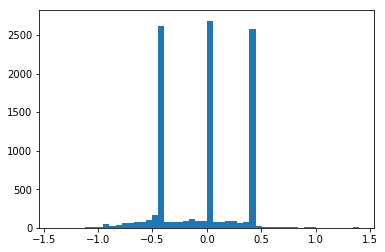

In [18]:
plt.hist(Y, 50);

In [41]:
next( filter( lambda x: x!=0, Y) )

-0.15

In [49]:
print(len(Y))

for i, elem in enumerate(Y):
    if elem != 0:
        break

print(i)

9720
15


-0.15


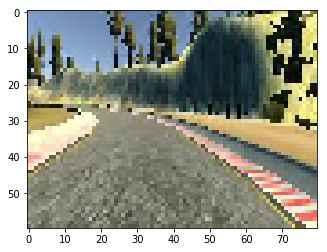

-0.49


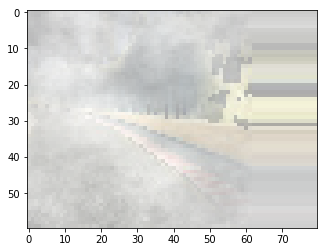

In [88]:
measurement_id = i

def augment(img, steering_angle):
    # Flip
    if random.random() > 0.5:
        img = img[:, ::-1, :]
        steering_angle = -steering_angle

    # Blur
    blurer = iaa.GaussianBlur(iap.Uniform(0.1, 1.0))
    img = blurer.augment_image(img)
    
    # Shuffle
    sh = iaa.ChannelShuffle(p=0.5)
    img = sh.augment_image(img)
    
    # Snow
    fog = iaa.Fog()
    img = fog.augment_image(img)
    
    # Translate
    tx = random.randint(-20, 20)
    translator = iaa.Affine(translate_px={"x":tx}, mode='edge')
    img = translator.augment_image(img)
    steering_angle += tx * 0.02
    
    return img, steering_angle

plt.imshow(X[measurement_id])
print(Y[measurement_id])
plt.show();

img, angle = augment(X[measurement_id], Y[measurement_id])
plt.imshow(img)
print(angle)
plt.show();

In [94]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [96]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(7776, 60, 80, 3) (7776,)
(1944, 60, 80, 3) (1944,)


In [104]:
Xgen = []
ygen = []

for i in range(X_train.shape[0]):
    img, angle = augment(X[i], Y[i])
    Xgen.append(img)
    ygen.append(angle)
    
Xgen = np.array(Xgen)
ygen = np.array(ygen)

print(Xgen.shape, ygen.shape)

(7776, 60, 80, 3) (7776,)


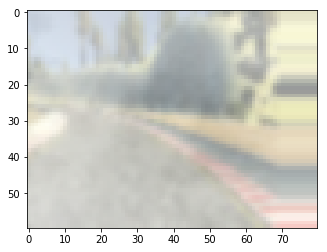

In [99]:
plt.imshow(Xgen[0])

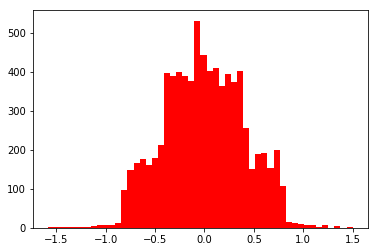

In [108]:
#plt.hist(Y_train, 50, facecolor='blue');
plt.hist(ygen, 50, facecolor='red');